In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/recipe-for-rating-predict-food-ratings-using-ml/sample.csv
/kaggle/input/recipe-for-rating-predict-food-ratings-using-ml/train.csv
/kaggle/input/recipe-for-rating-predict-food-ratings-using-ml/test.csv


In [2]:
sample=pd.read_csv("/kaggle/input/recipe-for-rating-predict-food-ratings-using-ml/sample.csv")
sample

,ID,Rating
0,1,5
1,2,2
2,3,4
3,4,2
4,5,4
...,...,...
995,996,3
996,997,0
997,998,1
998,999,0


In [3]:
train=pd.read_csv("/kaggle/input/recipe-for-rating-predict-food-ratings-using-ml/train.csv")

In [4]:
test=pd.read_csv("/kaggle/input/recipe-for-rating-predict-food-ratings-using-ml/test.csv")

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13636 entries, 0 to 13635
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   ID                 13636 non-null  int64 
 1   RecipeNumber       13636 non-null  int64 
 2   RecipeCode         13636 non-null  int64 
 3   RecipeName         13636 non-null  object
 4   CommentID          13636 non-null  object
 5   UserID             13636 non-null  object
 6   UserName           13636 non-null  object
 7   UserReputation     13636 non-null  int64 
 8   CreationTimestamp  13636 non-null  int64 
 9   ReplyCount         13636 non-null  int64 
 10  ThumbsUpCount      13636 non-null  int64 
 11  ThumbsDownCount    13636 non-null  int64 
 12  Rating             13636 non-null  int64 
 13  BestScore          13636 non-null  int64 
 14  Recipe_Review      13634 non-null  object
dtypes: int64(10), object(5)
memory usage: 1.6+ MB


In [6]:
train.isnull().sum()

ID                   0
RecipeNumber         0
RecipeCode           0
RecipeName           0
CommentID            0
UserID               0
UserName             0
UserReputation       0
CreationTimestamp    0
ReplyCount           0
ThumbsUpCount        0
ThumbsDownCount      0
Rating               0
BestScore            0
Recipe_Review        2
dtype: int64

In [7]:
test.isnull().sum()

ID                   0
RecipeNumber         0
RecipeCode           0
RecipeName           0
CommentID            0
UserID               0
UserName             0
UserReputation       0
CreationTimestamp    0
ReplyCount           0
ThumbsUpCount        0
ThumbsDownCount      0
BestScore            0
Recipe_Review        0
dtype: int64

In [8]:
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV,ShuffleSplit, cross_validate
from sklearn.preprocessing import MinMaxScaler,OneHotEncoder,OrdinalEncoder,MaxAbsScaler,PolynomialFeatures,StandardScaler,QuantileTransformer
from sklearn.feature_selection import SelectKBest, VarianceThreshold, mutual_info_regression,f_regression, chi2
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

In [9]:
train['thumb']=train['ThumbsUpCount'] - train['ThumbsDownCount']
test['thumb']=test['ThumbsUpCount'] - test['ThumbsDownCount']
train['time']=train['CreationTimestamp']/10**9
test['time']=test['CreationTimestamp']/10**9

<Axes: >

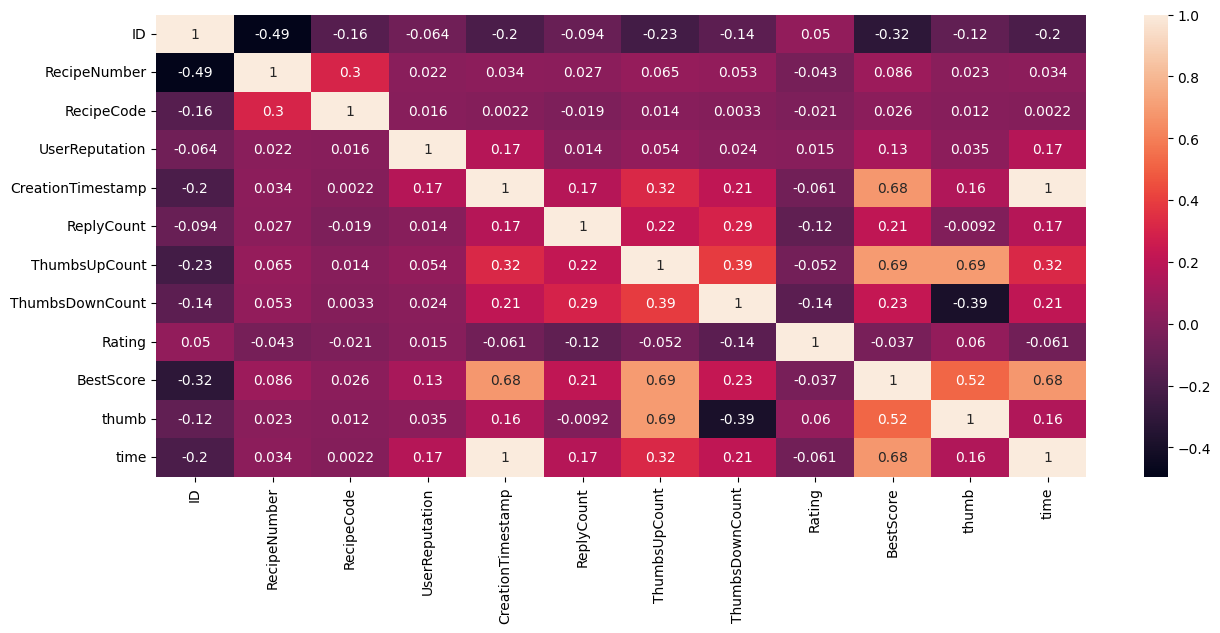

In [10]:
corr = train[['ID', 'RecipeNumber','RecipeCode', 'UserReputation', 'CreationTimestamp', 'ReplyCount',
       'ThumbsUpCount', 'ThumbsDownCount', 'Rating', 'BestScore', 'thumb','time']].corr()
plt.figure(figsize=(15,6))
sns.heatmap(corr,annot=True)

In [11]:
train.head()

,ID,RecipeNumber,RecipeCode,RecipeName,CommentID,UserID,UserName,UserReputation,CreationTimestamp,ReplyCount,ThumbsUpCount,ThumbsDownCount,Rating,BestScore,Recipe_Review,thumb,time
0,70,71,12259,Banana Bars with Cream Cheese Frosting,sp_aUSaElGf_12259_c_149978,u_1oKVaBmiEKwAFyiHrDLoWpbel0J,misscoffeepot,20,1622717078,0,0,0,5,100,great recipe! I have made them just as written...,0,1.622717
1,72,88,8202,Simple Taco Soup,sp_aUSaElGf_8202_c_310332,u_1oKZeRIXYzGNhGW8OMR3O4lX1ih,MichelleMalone,1,1622717852,0,0,1,5,100,This is an easy and quick recipe that is great...,-1,1.622718
2,458,3,2832,Cheeseburger Soup,sp_aUSaElGf_2832_c_206522,u_1oKYHUtdaD48KJCDYq5wfpAUxWz,jeannem32,1,1622717357,0,0,0,3,100,I think I was looking for something extra spec...,0,1.622717
3,7,50,100276,Grilled Huli Huli Chicken,sp_aUSaElGf_100276_c_434088,u_1oKZCQcKQZdQhDVBS7oISc216VA,ds422,1,1622648899,0,0,0,5,100,This is our favorite grilled chicken recipe. ...,0,1.622649
4,60,12,19731,Cauliflower Soup,sp_aUSaElGf_19731_c_387011,u_1oKd4sudZQPgu6YALiC7bW7mKMs,SusanHoward,1,1622718260,0,0,0,4,100,Great basic recipe. I added 2 teaspoons Tuscan...,0,1.622718


In [12]:
train.describe()

,ID,RecipeNumber,RecipeCode,UserReputation,CreationTimestamp,ReplyCount,ThumbsUpCount,ThumbsDownCount,Rating,BestScore,thumb,time
count,13636.000000,13636.000000,13636.000000,13636.000000,1.363600e+04,13636.000000,13636.000000,13636.000000,13636.000000,13636.000000,13636.000000,13636.000000
mean,121.085289,38.624377,21785.990833,2.160311,1.623713e+09,0.014520,1.098269,0.543708,4.288721,153.127897,0.554561,1.623713
std,116.995633,29.672351,23883.189918,10.086424,5.444020e+06,0.137323,4.166487,3.265660,1.544839,140.986908,4.164304,0.005444
min,0.000000,1.000000,386.000000,0.000000,1.613035e+09,0.000000,0.000000,0.000000,0.000000,0.000000,-121.000000,1.613035
25%,45.000000,12.000000,6504.000000,1.000000,1.622717e+09,0.000000,0.000000,0.000000,5.000000,100.000000,0.000000,1.622717
50%,91.000000,33.000000,14600.000000,1.000000,1.622718e+09,0.000000,0.000000,0.000000,5.000000,100.000000,0.000000,1.622718
75%,148.000000,63.000000,33121.000000,1.000000,1.622718e+09,0.000000,0.000000,0.000000,5.000000,100.000000,0.000000,1.622718
max,724.000000,100.000000,191775.000000,510.000000,1.665756e+09,3.000000,80.000000,126.000000,5.000000,946.000000,74.000000,1.665756


In [13]:
test.shape

(4546, 16)

In [14]:
train.shape

(13636, 17)

In [15]:
train.columns

Index(['ID', 'RecipeNumber', 'RecipeCode', 'RecipeName', 'CommentID', 'UserID',
       'UserName', 'UserReputation', 'CreationTimestamp', 'ReplyCount',
       'ThumbsUpCount', 'ThumbsDownCount', 'Rating', 'BestScore',
       'Recipe_Review', 'thumb', 'time'],
      dtype='object')

In [16]:
test.columns

Index(['ID', 'RecipeNumber', 'RecipeCode', 'RecipeName', 'CommentID', 'UserID',
       'UserName', 'UserReputation', 'CreationTimestamp', 'ReplyCount',
       'ThumbsUpCount', 'ThumbsDownCount', 'BestScore', 'Recipe_Review',
       'thumb', 'time'],
      dtype='object')

In [17]:
train=train.dropna()
k=train[['ReplyCount','ThumbsUpCount','ThumbsDownCount', 'UserReputation', 'BestScore','thumb', 'time', 'ID', 'RecipeNumber', 'RecipeCode']]
l=test[['ReplyCount','ThumbsUpCount', 'ThumbsDownCount', 'UserReputation', 'BestScore', 'thumb', 'time', 'ID', 'RecipeNumber', 'RecipeCode']]

In [18]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
k=scaler.fit_transform(k)
l=scaler.fit_transform(l)

In [19]:
k.shape, l.shape

((13634, 10), (4546, 10))

In [20]:
y=train['Rating']
train = train.drop(columns=['ID', 'RecipeNumber','CommentID', 'UserID', 'RecipeCode', 'UserReputation', 'CreationTimestamp', 'ReplyCount','ThumbsUpCount', 'Rating', 'ThumbsDownCount', 'BestScore', 'time', 'thumb'], axis=1)
test = test.drop(columns=['ID', 'RecipeNumber', 'CommentID', 'UserID', 'RecipeCode', 'UserReputation', 'CreationTimestamp', 'ReplyCount','ThumbsUpCount', 'ThumbsDownCount', 'BestScore', 'time', 'thumb'], axis=1)

In [21]:
train.shape, test.shape

((13634, 3), (4546, 3))

In [22]:
train.columns

Index(['RecipeName', 'UserName', 'Recipe_Review'], dtype='object')

In [23]:
test.columns

Index(['RecipeName', 'UserName', 'Recipe_Review'], dtype='object')

<Axes: xlabel='RecipeName', ylabel='Count'>

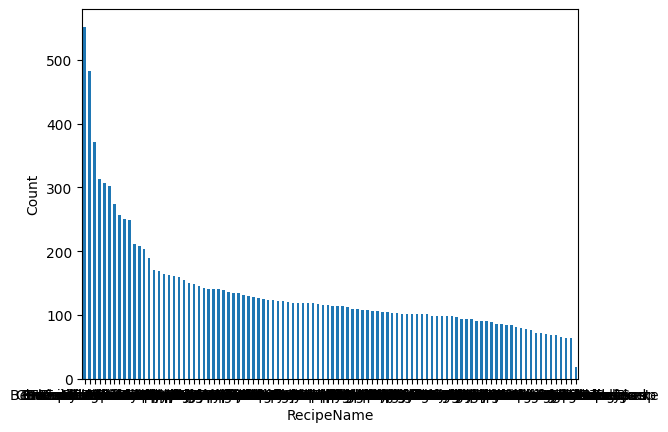

In [24]:
train['RecipeName'].value_counts().plot(kind='bar', ylabel='Count', rot=0)

In [25]:
train['UserName'].value_counts()

UserName
mjlouk               21
2124arizona          20
No_Time_To_Cook      20
grandmascooking22    19
justmbeth            18
                     ..
Frances442            1
Melinda174            1
manncw408             1
grandmaomaha          1
morgantowndan         1
Name: count, Length: 10619, dtype: int64

In [26]:
#numtrans=Pipeline(steps=[
     #('imputer',SimpleImputer(strategy='mean')),
     #('scaler',StandardScaler())])

#cattrans=Pipeline(steps=[
     #('imputer',SimpleImputer(strategy='most_frequent')),
     #('one',OneHotEncoder())])

In [27]:
#preprocessor=ColumnTransformer(
#transformers=[
    #('num', numtrans,numerical_col),
    #('cat', cattrans,categorical_col )
#])

In [28]:
y.shape

(13634,)

In [29]:
train.shape, test.shape

((13634, 3), (4546, 3))

In [30]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

vec_user = CountVectorizer()
vec_user.fit(train['UserName'].values)


X_train_user = vec_user.transform(train['UserName'].values)
X_test_user = vec_user.transform(test['UserName'].values)

print(X_train_user.shape, y.shape)
print(X_test_user.shape)

(13634, 10853) (13634,)
(4546, 10853)


In [31]:
vec = CountVectorizer()
vec.fit(train['RecipeName'].values)

X_train_res = vec.transform(train['RecipeName'].values)
X_test_res = vec.transform(test['RecipeName'].values)

print(X_train_res.shape, y.shape)
print(X_test_res.shape)

(13634, 185) (13634,)
(4546, 185)


In [32]:
vec_text = TfidfVectorizer(min_df=5,ngram_range=(1,4), max_features=10000)
vec_text.fit(train['Recipe_Review'].values)

X_train_text = vec_text.transform(train['Recipe_Review'].values)
X_test_text = vec_text.transform(test['Recipe_Review'].values)

print(X_train_text.shape, y.shape)
print(X_test_text.shape)

(13634, 10000) (13634,)
(4546, 10000)


In [33]:
from scipy.sparse import hstack

X_tr = hstack((X_train_user, X_train_res, X_train_text))
X_te = hstack((X_test_user, X_test_res, X_test_text))

print(X_tr.shape, y.shape)
print(X_te.shape)


(13634, 21038) (13634,)
(4546, 21038)


In [34]:
X_tr, X_te

(<13634x21038 sparse matrix of type '<class 'numpy.float64'>'
 	with 766545 stored elements in Compressed Sparse Row format>,
 <4546x21038 sparse matrix of type '<class 'numpy.float64'>'
 	with 247982 stored elements in Compressed Sparse Row format>)

In [35]:
from scipy.sparse import csr_matrix
sparse_matrix = csr_matrix((X_tr))
sparse_matrix_test = csr_matrix((X_te))

In [36]:
df_sparse = pd.DataFrame.sparse.from_spmatrix(sparse_matrix)
df_sparse_test = pd.DataFrame.sparse.from_spmatrix(sparse_matrix_test)
df_sparse.shape,df_sparse_test.shape

((13634, 21038), (4546, 21038))

In [37]:
df_sparse_reset = df_sparse.reset_index(drop=True).reset_index(drop=True)
df_sparse_test_reset = df_sparse_test.reset_index(drop=True).reset_index(drop=True)

In [38]:
k=pd.DataFrame(k)
l=pd.DataFrame(l)

In [39]:
k = k.reset_index(drop=True)
l=l.reset_index(drop=True)

In [40]:
df = pd.concat([df_sparse_reset, k], axis=1)
df_test=pd.concat([df_sparse_test_reset, l], axis=1)

In [41]:
df.shape, df_test.shape

((13634, 21048), (4546, 21048))

In [42]:
df.shape, y.shape, df_test.shape

((13634, 21048), (13634,), (4546, 21048))

In [43]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,0,1,2,3,4,5,6,7,8,9
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.10575,-0.263626,-0.166511,1.768603,-0.376874,-0.133185,-0.183034,-0.436471,1.091001,-0.398953
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.10575,-0.263626,0.139695,-0.115050,-0.376874,-0.373313,-0.182892,-0.419373,1.663960,-0.568819
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.10575,-0.263626,-0.166511,-0.115050,-0.376874,-0.133185,-0.182983,2.880494,-1.200833,-0.793661
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.10575,-0.263626,-0.166511,-0.115050,-0.376874,-0.133185,-0.195558,-0.975050,0.383229,3.286308
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.10575,-0.263626,-0.166511,-0.115050,-0.376874,-0.133185,-0.182817,-0.521959,-0.897502,-0.086101


In [44]:
df_test.head()

,0,1,2,3,4,5,6,7,8,9,...,0,1,2,3,4,5,6,7,8,9
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.106916,-0.246877,-0.140798,-0.118157,-0.376856,-0.102978,-0.177493,-0.315577,0.203004,0.811566
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.106916,-0.246877,0.107868,-0.118157,-0.376856,-0.310579,-0.177558,-0.177639,0.468555,-0.768046
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.106916,-0.246877,-0.140798,-0.118157,-0.376856,-0.102978,-0.177445,0.287901,0.468555,-0.768046
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.106916,0.682759,0.605200,-0.118157,0.415559,0.104622,-0.189974,-0.901814,1.663536,-0.843183
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.106916,-0.246877,0.107868,-0.118157,-0.376856,-0.310579,-0.177418,-0.824224,1.032852,0.434849


In [45]:
df=pd.DataFrame(df)
df_test=pd.DataFrame(df_test)

In [46]:
df.columns

Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9,
       ...
       0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
      dtype='int64', length=21048)

In [47]:
df.columns=df.columns.astype(str)
df_test.columns=df_test.columns.astype(str)
df.head()
df.columns

Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9',
       ...
       '0', '1', '2', '3', '4', '5', '6', '7', '8', '9'],
      dtype='object', length=21048)

In [48]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, classification_report
dummy_classifier = DummyClassifier(strategy='stratified')  # Other strategies: 'uniform', 'most_frequent', 'constant'
dummy_classifier.fit(df, y)

DummyClassifier(strategy='stratified')

In [49]:
y_pred = dummy_classifier.predict(df)

In [50]:
accuracy = accuracy_score(y, y_pred)
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.09      0.09      0.09      1272
           1       0.00      0.00      0.00       210
           2       0.01      0.01      0.01       174
           3       0.04      0.04      0.04       368
           4       0.10      0.10      0.10      1241
           5       0.76      0.75      0.76     10369

    accuracy                           0.59     13634
   macro avg       0.17      0.17      0.17     13634
weighted avg       0.59      0.59      0.59     13634



In [51]:
accuracy

0.5921959806366437

In [52]:
from sklearn.feature_selection import SelectPercentile, chi2

In [53]:
# Feature selection using SelectPercentile
#percentile = 20  # Select top 20% of features
#selector = SelectPercentile(chi2, percentile=percentile)
#X_train_selected = selector.fit_transform(df, y)
#df = selector.transform(df)
#df_test = selector.transform(df_test)

In [54]:
df.shape, df_test.shape

((13634, 21048), (4546, 21048))

In [55]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Assuming X_train and y_train are your feature and target matrices
#param_grid_rn = {
    #'n_estimators': [5,10,15, 20],
    #'max_depth': [5,10,15, 20],
    #'min_samples_split': [2, 3, 4, 5],
    #'min_samples_leaf': [3, 4, 5],
    #'max_features': ['sqrt', 'auto']
#}

#rf = RandomForestClassifier(random_state=42)

#grid_search1 = GridSearchCV(estimator=rf, param_grid=param_grid_rn, cv=5, scoring='accuracy')
#grid_search1.fit(df, y)

#best_params1 = grid_search1.best_params_

In [56]:
#param_grid_logistic = [    
    #{'penalty' : ['l2','l1'],
    #'C' : [0.1,0.01,0.001],
    #'solver' : ['lbfgs','newton-cg','liblinear','saga'],
    #'max_iter' : [200,500,1000],
   # }
#]

#log = LogisticRegression(random_state=42)

#grid_search2 = GridSearchCV(estimator=log, param_grid=param_grid_logistic, cv=5, n_jobs=-1,verbose=2, scoring='accuracy')
#grid_search2.fit(df, y)

#best_params2 = grid_search2.best_params_

In [57]:
#best_params1, best_params2
#({'max_depth': 20,
 # 'max_features': 'sqrt',
 # 'min_samples_leaf': 5,
  #'min_samples_split': 2,
  #'n_estimators': 5},
 #{'C': 0.1, 'max_iter': 200, 'penalty': 'l2', 'solver': 'lbfgs'})

In [58]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(C= 0.1, max_iter= 200, penalty='l2', solver= 'lbfgs', random_state=42)

lr.fit(df, y)

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


LogisticRegression(C=0.1, max_iter=200, random_state=42)

In [59]:
from sklearn.ensemble import RandomForestClassifier
r=RandomForestClassifier(max_depth=20, n_estimators=5, min_samples_split=2, min_samples_leaf=5, max_features="sqrt", random_state=42)
r.fit(df, y)

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


RandomForestClassifier(max_depth=20, min_samples_leaf=5, n_estimators=5,
                       random_state=42)

In [60]:
#from xgboost import XGBClassifier

#xgb = XGBClassifier(learning_rate=0.1,n_estimators=10,max_depth=20)

#xgb.fit(df, y)

In [61]:
y_plr=lr.predict(df)
accuracy_log = accuracy_score(y, y_plr)

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


In [62]:
y_pr=r.predict(df)
accuracy_randomforest = accuracy_score(y, y_pr)

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


In [63]:
#y_pxgb=xgb.predict(df)
#accuracy_xgb = accuracy_score(y, y_pxgb)

In [64]:
accuracy_log,accuracy_randomforest,#accuracy_xgb

(0.7707202581780842, 0.7614053102537773)

In [65]:
#param_grid_xgb = {
    #'learning_rate': [0.01, 0.1, 0.2],
    #'n_estimators': [50, 100, 200],
    #'max_depth': [3, 5, 7],
    #'gamma': [0, 0.1, 0.2],
#}

#xgboost = XGBClassifier(random_state=42)

#grid_search3 = GridSearchCV(estimator=xgboost, param_grid=param_grid_xgb, cv=5, scoring='accuracy')
#grid_search3.fit(df, y)

#best_params3 = grid_search3.best_params_

In [66]:
y_pxgbtest=lr.predict(df_test)

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


In [67]:
ID=[]
for i in range (1,len(y_pxgbtest)+1):
    ID.append(i)
final_prediction=pd.DataFrame({"ID":ID,"total_amount":y_pxgbtest})
final_prediction.to_csv("last_submission.csv",index=False)